In [ ]:
import torch
import torch.nn as nn
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

plt.style.use("dark_background")

In [ ]:
nPerClust = 100
blur = 1

A = [1, 1]
B = [5, 1]

a = [A[0] + np.random.randn(nPerClust) * blur, A[1] + np.random.randn(nPerClust) * blur]
b = [B[0] + np.random.randn(nPerClust) * blur, B[1] + np.random.randn(nPerClust) * blur]

# expected output shape:
labels = np.vstack((np.zeros((nPerClust, 1)), np.ones((nPerClust, 1))))
# expected input shape: N x D
data = np.hstack((a, b))
print(f"labels.shape: {labels.shape}, data.shape:{data.shape}")

labels.shape: (200, 1), data.shape:(2, 200)


* as we can see the input shape is now D x N
* to convert it N x D we have multiple options, reshaping, transposing etc.

In [ ]:
data = data.T
data.shape

(200, 2)

In [ ]:
# data = torch.from_numpy(data.astype(np.float32))
# labels = torch.from_numpy(labels.astype(np.float32))
# data.dtype

* The code above and below does the same thing but the code below is more readible I belive.

In [ ]:
data = torch.tensor(data).float()
labels = torch.tensor(labels).float()
data.dtype

torch.float32

* The code above firstly takes the labels where it equals to 0
* Then, it takes for label X axes due to we only have vertical axes on labels
* So, we subcript [0]
* Finally, for X axes we take 0, for Y we take 1
* blue square, red o

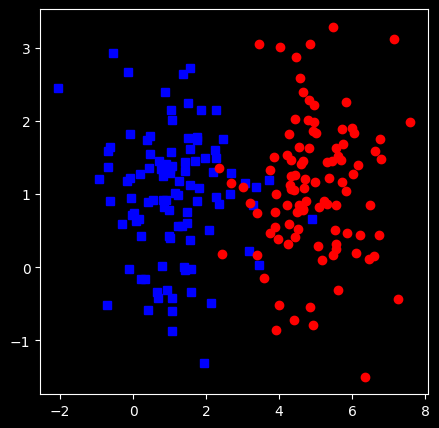

In [ ]:
plt.figure(figsize=(5, 5))
plt.plot(data[np.where(labels==0)[0], 0], data[np.where(labels==0)[0], 1], "bs")
plt.plot(data[np.where(labels==1)[0], 0], data[np.where(labels==1)[0], 1], "ro")

In [ ]:
def create_model(lr=0.01, n_epochs=1000):
    """
    input:
    takes lr=0.01, n_epochs=1000 with default parameters as an input

    returns:
    PyTorch model, optimizer, criterion
    """

    model = nn.Sequential(
        nn.Linear(2, 1),
        nn.ReLU(),
        nn.Linear(1, 1),
      # nn.Sigmoid()
    )

    optimizer = torch.optim.SGD(model.parameters(), lr=lr)
    criterion = nn.BCEWithLogitsLoss()

    return model, optimizer, criterion

In [ ]:
def train_model(model, optimizer, criterion, n_epochs=1000):
    """
    input:
    takes lr=0.01, n_epochs=1000 with default parameters as an input

    returns:
    PyTorch model and losses
    """

    losses = torch.zeros(n_epochs)

    for i in range(n_epochs):
        ypred = model(data)

        loss = criterion(ypred, labels)
        losses[i] = loss.item()

        # backprop
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

    # final forward pass
    pred = model(data)
    acc = 100 * torch.mean(((pred>0) == labels).float())

    return model, losses, acc, pred

In [ ]:
model, optim, criterion = create_model()
model, losses, acc, pred = train_model(model, optim, criterion)

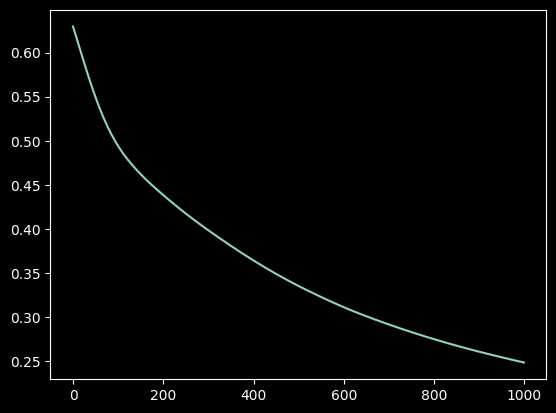

In [ ]:
plt.plot(losses.detach())


In [ ]:
prediction_labels = (pred > 0)

misclassified = np.where(prediction_labels != labels)[0]

In [ ]:
acc

tensor(95.)

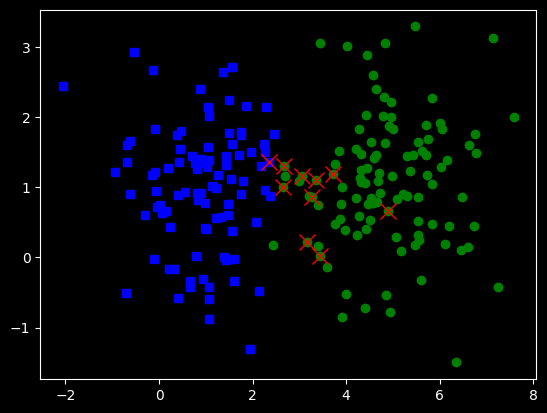

In [ ]:
plt.plot(data[np.where(prediction_labels)[0], 0], data[np.where(prediction_labels)[0], 1], "go")
plt.plot(data[np.where(~prediction_labels)[0], 0], data[np.where(~prediction_labels)[0], 1], "bs")
plt.plot(data[misclassified, 0], data[misclassified, 1], "rx", markersize=12)

In [ ]:
test = 100
learning_rates = np.linspace(0.001, 0.1, 40)
n_epochs = 1000

accByLr = []
allLosses = np.zeros((len(learning_rates), n_epochs))

for t in range(test): # 100 times it will loop through
    for i, lr in enumerate(learning_rates):
        model, optim, criterion = create_model(lr=lr, n_epochs=n_epochs)
        _, losses, acc, _ = train_model(model, optim, criterion)

        allLosses[i, :] = losses.detach()
        accByLr.append(acc)


In [ ]:
len(accByLr)

4000

In [ ]:
learning_rates.shape

(40,)

In [ ]:
# fig, ax = plt.subplots(1,2,figsize=(12,4))
#
# ax[0].set_title('Accuracy by learning rate')
# ax[0].plot(learning_rates, accByLr, "s-" ,label="Acc")
# ax[0].set_xlabel("Learning Rates")
# ax[0].set_ylabel("Accuracy")
#
# ax[1].set_title("Losses by Learning Rate in terms of Epochs")
# ax[1].plot(allLosses.T) # To make Epcohs on the x axis
# ax[1].set_xlabel("Epochs")
# ax[1].set_ylabel("Losses by Epochs")
# ax[1].legend(learning_rates)

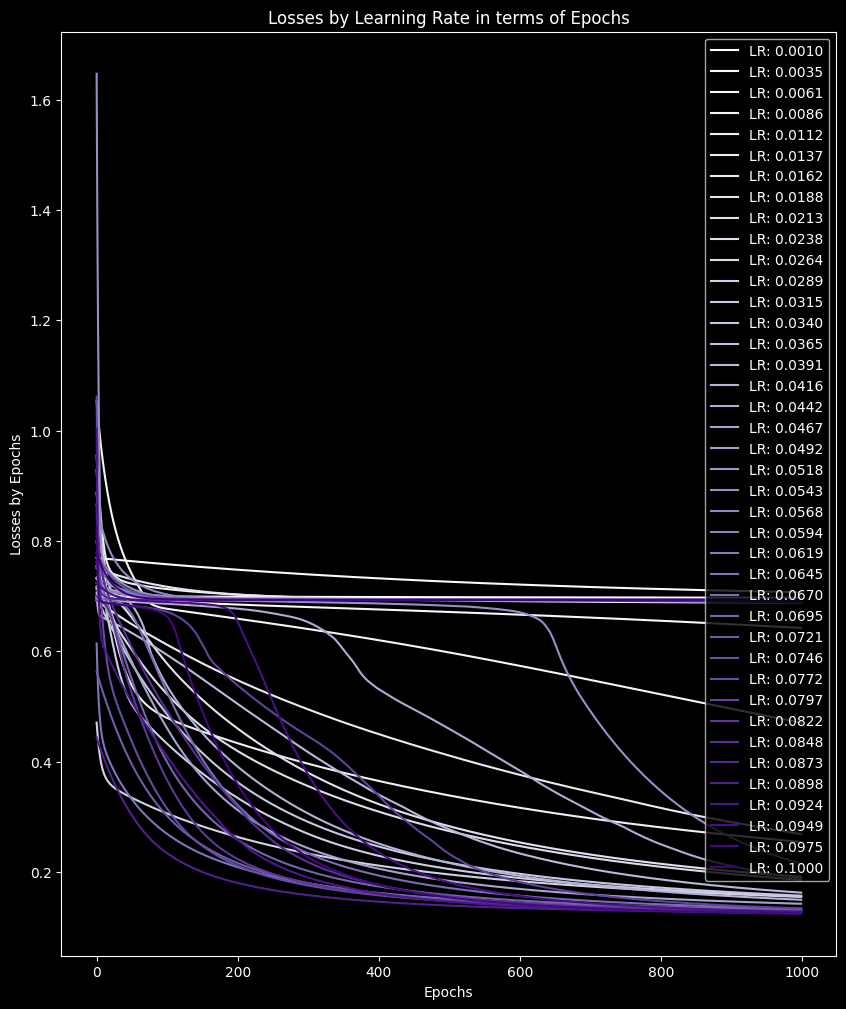

In [ ]:
cmap = plt.get_cmap("Purples")
norm = plt.Normalize(vmin=0, vmax=len(learning_rates) - 1)

# Plot each line with a color from the colormap
plt.figure(figsize=(10, 12))
plt.title("Losses by Learning Rate in terms of Epochs")

for i in range(len(learning_rates)):
    plt.plot(allLosses[i], color=cmap(norm(i)), label=f"LR: {learning_rates[i]:.4f}")

plt.xlabel("Epochs")
plt.ylabel("Losses by Epochs")
plt.legend(loc="best")
plt.show()

* To understand Autograd in PyTorch, I analyzed as an example.

In [ ]:
x = torch.tensor([2.0, 3.0, 5.12], requires_grad=True)
y = x**2 + 3*x + 4

# Compute a scalar value (e.g., loss)
loss = y.sum()

# Backward pass: compute gradients
loss.backward()

# Gradients are stored in the .grad attribute of x
print(x.grad)

tensor([ 7.0000,  9.0000, 13.2400])
